# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [19]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [225]:
def max_element(x):
    #zero = np.where(x==0)
    index = x==0
    return max(x[1:][index[:-1]])

x=np.array([6,2,0,3,0,0,5,7,0])
print(max_element(x))

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [24]:
def nearest_value(X, v):
    return np.argmin(np.abs(X-v))

print(nearest_value(np.arange(0,10).reshape((2, 5)),3.6))    

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [260]:
def scale(X):
    std = X.std(axis=1)
    mean = X.mean(axis=1)
    X=X-mean
    try:
        X=X/std
    except:
        return 'division by zero'
    else:
        return X
a=np.random.randint(10, size=(2, 2))
print('Исходная матрица:')
print(a)
print(scale(a))



Исходная матрица:
[[8 0]
 [2 9]]
[[ 1.         -1.57142857]
 [-0.5         1.        ]]


я**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [112]:
def get_stats(X):
    print('Определитель', np.linalg.det(X))
    print('След', np.trace(X))
    print('Наибольший', X.max())
    print('Наименьший', X.min())
    print('Норма фробениуса', np.linalg.norm(X))
    print('Собственные числа', np.linalg.eig(X)[0])
    print('Обратная матрица', np.linalg.inv(X))
    
X = np.array([np.random.normal(10, 1, size=(2,2))])
print('Исходная матрица:',X)
get_stats(X)

Исходная матрица: [[[11.05430854 11.63650083]
  [ 9.687324    9.56909238]]]
Определитель [-6.94685415]
След [11.05430854 11.63650083]
Наибольший 11.636500828810771
Наименьший 9.56909237580086
Норма фробениуса 21.047984795183186
Собственные числа [[20.95491522 -0.3315143 ]]
Обратная матрица [[[-1.37747132  1.67507487]
  [ 1.39449077 -1.59126826]]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [119]:
max_ = np.array([])
for exp_num in range(100):
    X1 = np.array([np.random.normal(0,1,size=(10,10))])
    X2 = np.array([np.random.normal(0, 1, size=(10,10))])
    max_=np.append(max_,np.dot(X1, X2).max())
print('Среднее значение по экспериментам у максимальных элементов:', max_.mean())
print('Процентиль:', np.percentile(max_, 95))



Среднее значение по экспериментам у максимальных элементов: 8.285461453230319
Процентиль: 11.35266908716942


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [160]:
import pandas as pd
%matplotlib inline
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

Самая частая причина отмены рейса А-carrier

In [128]:
df = pd.read_csv('2008.csv')
df.groupby("CancellationCode").sum()['Cancelled']

CancellationCode
A    563
B    549
C    299
Name: Cancelled, dtype: int64

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [129]:
print('Среднее расстояние', df["Distance"].mean())
print('Минимальное расстояние', df["Distance"].min())
print('Максимальное расстояние', df["Distance"].max())

Среднее расстояние 724.5082571428571
Минимальное расстояние 31
Максимальное расстояние 4962


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [139]:
print('Рейсы с подозрительным расстоянием:')
df8=df[df.Distance==31][['Year','Month','DayofMonth','FlightNum']]
df8

Рейсы с подозрительным расстоянием:


,Year,Month,DayofMonth,FlightNum
1116,2008,12,30,65
6958,2008,12,26,65
17349,2008,8,18,64
27534,2008,3,11,64
46082,2008,8,9,65
48112,2008,2,28,64


In [141]:
df65=df[df.FlightNum==65][['Distance']]
df65['Distance'].sum()

30557

In [142]:
df64=df[df.FlightNum==64][['Distance']]
df64['Distance'].sum()

29177

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

В таблице нет информации о городе. Судя по названию это Атланта.

In [168]:
airport=df.groupby('Origin')[['Year']].count()
airport.loc[airport['Year']==airport['Year'].max()]

,Year
Origin,
ATL,4134


**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [170]:
time=df.groupby('Origin')[['AirTime']].mean()
time

,AirTime
Origin,
ABE,88.266667
ABI,36.400000
ABQ,93.454321
ABY,35.714286
ACK,50.800000
...,...
WRG,18.000000
XNA,85.945736
YAK,35.900000


Аэропорт с наибольшим показателем: 

In [171]:
time.loc[time['AirTime']==time['AirTime'].max()]

,AirTime
Origin,
SJU,205.2


**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [258]:
airports = df[df['Cancelled'] != 1][['Origin', 'DepDelay']].groupby('Origin').filter(lambda x: len(x) > 1000)
delay=airports[airports['DepDelay'] > 0].groupby('Origin')
max_=np.array(delay.size())/ np.array(airports.groupby('Origin').size())
print(airports.groupby('Origin').size(), 'ответ: аэропорт с индексом', max_.argmax())
print('EWR')

Origin
ATL    4078
BOS    1128
BWI    1018
CLT    1229
DEN    2353
DFW    2730
DTW    1588
EWR    1343
IAH    1770
JFK    1172
LAS    1773
LAX    2063
LGA    1114
MCO    1324
MSP    1233
ORD    3391
PHL    1007
PHX    2010
SEA    1114
SFO    1371
SLC    1313
dtype: int64 ответ: аэропорт под номером 7
EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [237]:
df=pd.read_csv('2008.csv')
df.isnull()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
69996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
69998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


да, имеются

In [191]:
df.isnull().values.sum()

355215

355215 элементов пропущено

In [195]:
a=np.array(df.isnull().values.sum(axis=1))
print(np.count_nonzero(a),'элементов имеют хотя бы одно ненулевое значение')

70000 элементов имеют ненулевое значение


In [197]:
a=np.array(df.isnull().values.sum(axis=0))
print(np.count_nonzero(a),'признаков имеют хотя бы одно ненулевое значение')

16 признаков имеют хотя бы одно ненулевое значение


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

да, имеются.


In [305]:
df=pd.read_csv('2008.csv')
df[(df['DepDelay']<0)|(df['DepDelay']==0)]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,-2.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,-3.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,-5.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,3,31,1,1359.0,1400,1413.0,1415,WN,1589,N387SW,74.0,75.0,55.0,-2.0,-1.0,ABQ,PHX,328,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,4,22,2,1815.0,1820,2057.0,2131,DL,617,N3765,342.0,371.0,302.0,-34.0,-5.0,JFK,LAS,2248,9.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69992,2008,11,4,2,754.0,801,1027.0,1039,UA,885,N219UA,273.0,278.0,251.0,-12.0,-7.0,ORD,SFO,1846,5.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,N655CA,110.0,113.0,85.0,-8.0,-5.0,CVG,BDL,661,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,N988DL,128.0,129.0,86.0,-12.0,-11.0,ORD,ATL,606,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,N77331,80.0,80.0,63.0,0.0,0.0,DAY,IAD,368,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [306]:
vector = np.array(df["DepDelay"])
df = df.drop(columns="DepDelay")
print(vector)
df

[16. 16. -2. ...  0.  6. -1.]


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,N699SW,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,N15980,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,N464WN,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,N465SW,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,N489WN,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,N988DL,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,N776SK,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,N77331,80.0,80.0,63.0,0.0,DAY,IAD,368,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,N318US,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [299]:
def time(column,columnname, df):
    vector=column
    df[columnname + '_Hour'] = vector//100
    df[columnname + '_Minute'] = vector%100
    df = df.drop(columns=columnname)
    return df

df=time(df['DepTime'],'DepTime',df)
df=time(df['CRSDepTime'],'CRSDepTime',df)
df=time(df['ArrTime'],'ArrTime',df)
df=time(df['CRSArrTime'],'CRSArrTime',df)
df

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,8.0,MDW,CLE,307,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,2.0,IAH,AVL,834,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,-19.0,MDW,TPA,997,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,-12.0,SLC,FCA,532,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,-17.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,-12.0,ORD,ATL,606,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,22.0,ORD,GRR,137,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69997,2008,9,24,3,YV,7058,N77331,80.0,80.0,63.0,0.0,DAY,IAD,368,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,10.0,12.0,10,12,11.0,32.0,11,32
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,21.0,RSW,MSP,1416,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


In [285]:
df['DepTime']

0        2111.0
1        1426.0
2        1143.0
3        1141.0
4         815.0
          ...  
69995    1829.0
69996    1149.0
69997    1012.0
69998    1906.0
69999     859.0
Name: DepTime, Length: 70000, dtype: float64

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [312]:
df["DepDelay"] = vector
corr = df.corrwith(df['DepDelay'])
corr.sort_values()

Month               -0.027598
Cancelled           -0.000808
DayofMonth           0.008002
DayOfWeek            0.008023
SecurityDelay        0.011400
FlightNum            0.015708
TaxiIn               0.020684
Distance             0.024383
Diverted             0.024980
AirTime              0.025105
CRSElapsedTime       0.033920
ActualElapsedTime    0.041170
ArrTime              0.069991
TaxiOut              0.097841
CRSArrTime           0.133053
CRSDepTime           0.137659
NASDelay             0.162387
DepTime              0.198135
WeatherDelay         0.240096
CarrierDelay         0.535580
LateAircraftDelay    0.558168
ArrDelay             0.930046
DepDelay             1.000000
Year                      NaN
dtype: float64

Исключаем по заданию TailNum, Year. WeatherDelay, CarrierDelay, LateAircraftDelay исключаем так как у них довольно высокий коэффициент корреляции. Остальные задержки исключаю, тк не стоит использовать их при прогнозе, они являются будущим по которому не совсем корректно делать прогноз. 


In [313]:
# Исключаю по заданию 
df = df.drop(columns=['TailNum', 'Year'])
df = df.drop(columns=['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','ArrDelay'])
df

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,DepDelay
0,6,18,3,2111.0,2055,2308.0,2300,WN,242,57.0,65.0,46.0,MDW,CLE,307,3.0,8.0,0,NaN,0,16.0
1,6,4,3,1426.0,1410,1730.0,1728,XE,2380,124.0,138.0,108.0,IAH,AVL,834,4.0,12.0,0,NaN,0,16.0
2,8,3,7,1143.0,1145,1501.0,1520,WN,1769,138.0,155.0,125.0,MDW,TPA,997,4.0,9.0,0,NaN,0,-2.0
3,1,23,3,1141.0,1144,1323.0,1335,OO,3802,102.0,111.0,79.0,SLC,FCA,532,4.0,19.0,0,NaN,0,-3.0
4,5,4,7,815.0,820,1243.0,1300,WN,399,148.0,160.0,136.0,LAS,AUS,1090,4.0,8.0,0,NaN,0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,5,12,1,1829.0,1840,2137.0,2149,DL,794,128.0,129.0,86.0,ORD,ATL,606,22.0,20.0,0,NaN,0,-11.0
69996,5,11,7,1149.0,1125,1336.0,1314,OO,6159,47.0,49.0,30.0,ORD,GRR,137,4.0,13.0,0,NaN,0,24.0
69997,9,24,3,1012.0,1012,1132.0,1132,YV,7058,80.0,80.0,63.0,DAY,IAD,368,7.0,10.0,0,NaN,0,0.0
69998,2,18,1,1906.0,1900,2200.0,2139,NW,641,234.0,219.0,192.0,RSW,MSP,1416,20.0,22.0,0,NaN,0,6.0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<AxesSubplot:>

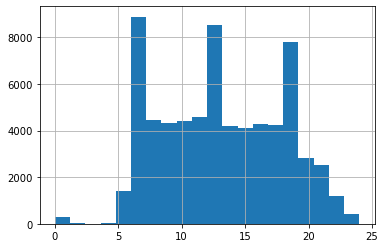

In [314]:
X['DepTime_Hour'].hist(bins=20)

<AxesSubplot:>

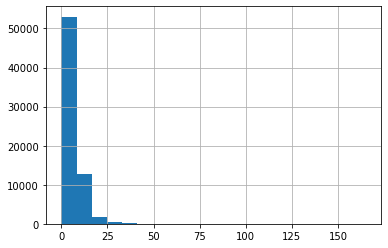

In [315]:
X['TaxiIn'].hist(bins=20)

<AxesSubplot:>

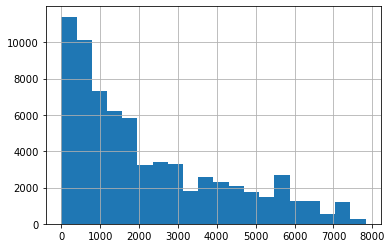

In [316]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [319]:
df.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
DepDelay             float64
dtype: object

In [325]:
from sklearn.preprocessing import StandardScaler
def transform_data(data):
    for i in ['DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','TaxiIn','TaxiOut','DepDelay']:
        data.loc[data[i].isnull(), i] = 0
    for i in ['UniqueCarrier','Origin','Dest','CancellationCode']:
        data.loc[data[i].isnull(), i] = 'nan'
    s=['DepTime','ArrTime','ActualElapsedTime','CRSElapsedTime','AirTime','TaxiIn','TaxiOut','DepDelay','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','FlightNum','Distance','Cancelled','Diverted']
    scaler = StandardScaler()
    scaler.fit(data[s])
    data[s] = scaler.transform(data[s])
    data = pd.get_dummies(data)
    return data

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,DepDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,...,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest_TEX,Dest_TLH,Dest_TOL,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_nan
0,-0.111232,0.256159,-0.463891,1.588920,1.577587,1.583604,1.674235,-1.004665,-0.930601,-0.912187,-0.805728,-0.738324,-0.748794,-0.709878,-0.143429,-0.049486,0.181158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.111232,-1.332282,-0.463891,0.239500,0.185185,0.522072,0.487680,0.084156,-0.001271,0.135521,0.096865,0.193626,-0.546142,-0.359559,-0.143429,-0.049486,0.181158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.473737,-1.445742,1.540176,-0.317997,-0.386887,0.101500,0.056206,-0.227008,0.192918,0.379508,0.344350,0.481876,-0.546142,-0.622298,-0.143429,-0.049486,-0.341343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.573653,0.823459,-0.463891,-0.321937,-0.389046,-0.225408,-0.327557,0.808339,-0.306424,-0.251988,-0.325316,-0.340433,-0.546142,0.253500,-0.143429,-0.049486,-0.370371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.403716,-1.332282,1.540176,-0.964143,-1.088485,-0.372333,-0.400161,-0.924709,0.331624,0.451269,0.504488,0.646338,-0.546142,-0.709878,-0.143429,-0.049486,-0.428427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.403716,-0.424602,-1.465925,1.033393,1.113453,1.269552,1.361001,-0.723547,0.054212,0.006351,-0.223410,-0.209571,3.101581,0.341079,-0.143429,-0.049486,-0.602594,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69996,-0.403716,-0.538062,1.540176,-0.306178,-0.430062,-0.201532,-0.371119,2.008690,-1.069307,-1.141822,-1.038656,-1.038953,-0.546142,-0.271979,-0.143429,-0.049486,0.413381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69997,0.766221,0.936919,-0.463891,-0.576062,-0.674003,-0.576191,-0.748659,2.466524,-

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [327]:
copy=transform_data(df)
copy

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,DepDelay,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,Origin_AEX,Origin_AGS,Origin_AKN,...,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest_TEX,Dest_TLH,Dest_TOL,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_nan
0,-0.111232,0.256159,-0.463891,1.588920,1.577587,1.583604,1.674235,-1.004665,-0.930601,-0.912187,-0.805728,-0.738324,-0.748794,-0.709878,-0.143429,-0.049486,0.181158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.111232,-1.332282,-0.463891,0.239500,0.185185,0.522072,0.487680,0.084156,-0.001271,0.135521,0.096865,0.193626,-0.546142,-0.359559,-0.143429,-0.049486,0.181158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.473737,-1.445742,1.540176,-0.317997,-0.386887,0.101500,0.056206,-0.227008,0.192918,0.379508,0.344350,0.481876,-0.546142,-0.622298,-0.143429,-0.049486,-0.341343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-1.573653,0.823459,-0.463891,-0.321937,-0.389046,-0.225408,-0.327557,0.808339,-0.306424,-0.251988,-0.325316,-0.340433,-0.546142,0.253500,-0.143429,-0.049486,-0.370371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,-0.403716,-1.332282,1.540176,-0.964143,-1.088485,-0.372333,-0.400161,-0.924709,0.331624,0.451269,0.504488,0.646338,-0.546142,-0.709878,-0.143429,-0.049486,-0.428427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.403716,-0.424602,-1.465925,1.033393,1.113453,1.269552,1.361001,-0.723547,0.054212,0.006351,-0.223410,-0.209571,3.101581,0.341079,-0.143429,-0.049486,-0.602594,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69996,-0.403716,-0.538062,1.540176,-0.306178,-0.430062,-0.201532,-0.371119,2.008690,-1.069307,-1.141822,-1.038656,-1.038953,-0.546142,-0.271979,-0.143429,-0.049486,0.413381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
69997,0.766221,0.936919,-0.463891,-0.576062,-0.674003,-0.576191,-0.748659,2.466524,-

In [333]:
print(copy.columns.size,'признака')

637 признака


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [328]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(copy,vector, test_size=0.3, random_state=42)
#len(X_train), len(X_test)

(49000, 21000)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [337]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
Regr=LinearRegression().fit(X_train[:1000], Y_train[:1000])
Train_prediction=Regr.predict(X_train[:1000])
Test_prediction=Regr.predict(X_test)
print(mean_squared_error(Y_train[:1000],Train_prediction),r2_score(Y_train[:1000],Train_prediction))
print(mean_squared_error(Y_test,Test_prediction),r2_score(Y_test,Test_prediction))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [ ]:
# Your code here
# ...

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?